# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [9]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [13]:
df=pd.read_csv('/Users/ildem/Desktop/Lab_5_ Pivot-Tables-and-Crosstab/Employee.csv')
df

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [12]:
# Method 1
df.pivot_table(index='Department', values='Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [21]:
# Method 2
df.groupby(['Department'])[['Salary']].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [19]:
df.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc='mean')


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [23]:
df.pivot_table(index=['Title'], columns=['Years'], values=['Salary'], aggfunc='mean')

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [32]:
df.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['count', 'mean'])

count   mean
                     Salary Salary
Department Title                  
HR         VP             1   70.0
           analyst        2   32.5
IT         VP             1   70.0
           analyst        2   32.5
           associate      1   60.0
Sales      associate      2   55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [38]:
df_stats=df.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['median', 'min', 'max', 'std'])
df_stats

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [ ]:
"""
As some of the groups have only 1 value, median, min and max are all the same value
and we get NaN as standard deviation for those groups. 
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [39]:
# your code here
df_stats.fillna(0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [40]:
df.pivot_table(index=['Department'], values=['Salary'], aggfunc=['count', 'sum'])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [48]:
df_grouped=df.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc='mean')

df_grouped

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

In [49]:
df_grouped2=df.pivot_table(index=['Department', 'Title'], values=['Years'], aggfunc='sum')
df_grouped2

Years
Department Title           
HR         VP             8
           analyst        6
IT         VP             8
           analyst        3
           associate      7
Sales      associate      5

In [53]:
df_grouped['Years']=df_grouped2['Years']
df_grouped

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [54]:
fitbit=pd.read_csv('/Users/ildem/Desktop/Lab_5_ Pivot-Tables-and-Crosstab/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [55]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [56]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [57]:
fitbit['Steps'].corr(fitbit['Minutes Very Active'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [58]:
import matplotlib.pyplot as plt;

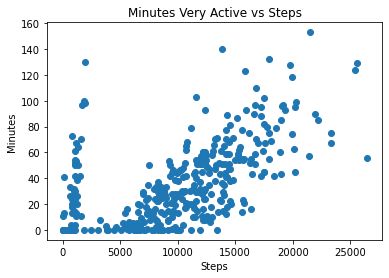

In [59]:
plt.scatter(fitbit['Steps'], fitbit['Minutes Very Active'])
plt.title('Minutes Very Active vs Steps')
plt.xlabel('Steps')
plt.ylabel('Minutes')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
The correlation between them is 0.57 and from the plot we see that with increasing number of steps, 
the number of very active minutes increases.
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [60]:
fitbit['Steps'].corr(fitbit['Minutes Sedentary'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

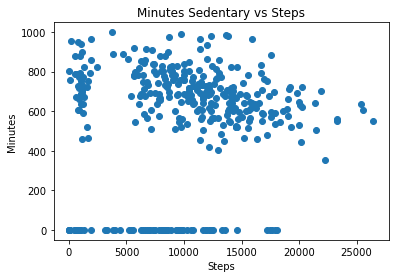

In [61]:
plt.scatter(fitbit['Steps'], fitbit['Minutes Sedentary'])
plt.title('Minutes Sedentary vs Steps')
plt.xlabel('Steps')
plt.ylabel('Minutes')
plt.show()

In [ ]:
"""
These two variables do not show a high correlation. In the plot, we see that the range of sedentary minutes do not 
change by increasing number of steps.
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [63]:
fitbit['Steps'].corr(fitbit['MinutesOfSleep'])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

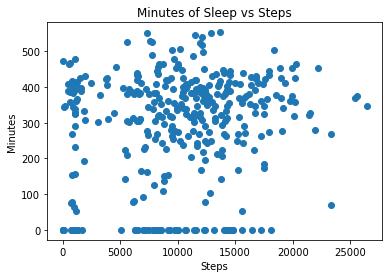

In [64]:
plt.scatter(fitbit['Steps'], fitbit['MinutesOfSleep'])
plt.title('Minutes of Sleep vs Steps')
plt.xlabel('Steps')
plt.ylabel('Minutes')
plt.show()

In [ ]:
"""
The correlation between these two variables is also small. In the graph we do not see a relationship between
minutes of sleep and steps.
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [65]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [67]:
cor_fit= fitbit[columns]
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [68]:
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [69]:
time_grades=pd.read_csv('/Users/ildem/Desktop/Lab_5_ Pivot-Tables-and-Crosstab/Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

In [110]:
time_grades['freq']=time_grades['Grade'].map(time_grades['Grade'].value_counts())
time_grades

time_grades['Grade', 'freq'].value.counts()

,Name,Study time,Grade,freq
0,Jose,4,4,1
1,Maria,9,7,4
2,David,8,9,3
3,Sonia,10,7,4
4,Samuel,20,9,3
5,Eva,5,3,2
6,Carlos,12,7,4
7,Pedro,6,5,1
8,Ana,18,9,3
9,Gervasio,7,3,2


Text(0, 0.5, 'Frequency')

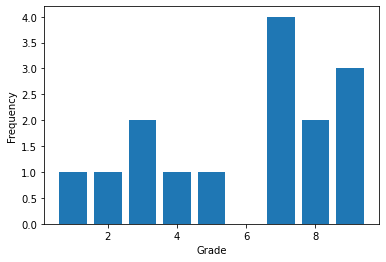

In [113]:
plt.bar(time_grades.Grade, time_grades.freq)
plt.xlabel('Grade')
plt.ylabel('Frequency')

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [87]:
cols=time_grades[['Grade', 'Study time']]
c_pearson=cols.corr()
c_pearson

,Grade,Study time
Grade,1.000000,0.798046
Study time,0.798046,1.000000


In [88]:
c_spearman=cols.corr(method='spearman')
c_spearman

,Grade,Study time
Grade,1.000000,0.819659
Study time,0.819659,1.000000


In [ ]:
"""
Both tests give us a high correlation between study time and grade. 
The value we get with spearman test is higher than pearson.
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

Text(0, 0.5, 'Study time')

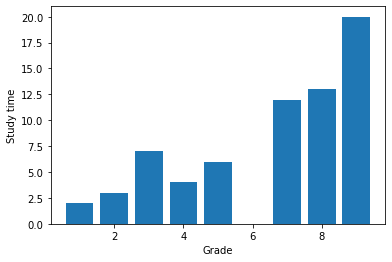

In [94]:
plt.bar(time_grades.Grade, time_grades['Study time'])
plt.xlabel('Grade')
plt.ylabel('Study time')

In [ ]:
"""
Grade and study time are highly correlated and we see on the graph that as study time increases, grade also increases.
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
Speraman correlation ranks the data first and then uses pearson correlation on those ranks. By this, it is able to 
,easure non-linear relationships unlike Pearson.
"""